<a href="https://colab.research.google.com/github/DipanshuKumar449/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name   -    Mobile Price Range Prediction**



##### **Project Type**    - Classification.
##### **Contribution**    - Individual.
##### **By**  - Dipanshu Kumar 
       (cohort Azaadi)



# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

**The objective** is to find out some relation between features of a mobile phone(e.g:- RAM, Internal Memory etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


**Importance of Price Prediction**

The price of a product is the most important attribute of marketing that product. One of those products where price matters a lot is a smartphone because it comes with a lot of features so that a company thinks a lot about how to price this mobile which can justify the features and also cover the marketing and manufacturing costs of the mobile.

Also, Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is a very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be and there comes Machine Learning Alogorithms to predict the price.

## Variables Description:

**Battery_power**: Total energy a battery can store in one time measured in mAh.

**Blue**: Has bluetooth or not.

**Clock_speed**: Speed at which microprocessor executes instructions.

**Dual_sim**: Has dual sim support or not.

**Fc**: Front camera mega pixels.

**Four_g**: Has 4G or not.

**Int_memory**: Internal memory in gigabytes.

**M_dep**: Mobile depth in cm.

**Mobile_wt**: Weight of mobile phone.

**N_cores**: Number of cores of processor.

**Pc**: Primary camera mega pixels.

**Px_height**: Pixel resolution height.

**Px_width**: Pixel resolution width.

**Ram**: Random Access Memory in Megabytes.

**Sc_h**: Screen height of mobile in cm.

**Sc_w**: Screen width of mobile in cm.

**Talk_time**: Longest time that a single battery charge will last when you are talking over phone.

**Three_g**: Has 3G or not.

**Touch_screen**: Has touch screen or not.

**Wifi**: Has wifi or not.

**Price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

## ***Let's Begin !***

## **Knowing The Data**

### Importing Libraries

In [ ]:
# Importing Libraries
import numpy as np
from numpy import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix,roc_auc_score,classification_report

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
#Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Mobile Price Range Prediction - Dipanshu Kumar/data_mobile_price_range.csv")

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape
print(f'The total number of rows in the datset : {df.shape[0]}')
print(f'The total number of columns in the datset : {df.shape[1]}')

The total number of rows in the datset : 2000
The total number of columns in the datset : 21


### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Visualizing the missing values

### Things known about the dataset till now.

The dataset from above understanding consists of 2000 rows and 21 columns with no duplicate and no null values.

## **Understanding The Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#creating list of numerical and categorical columns

numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_column=list(set(df.columns)-set(numerical_columns))


In [ ]:
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
print(categorical_column)

['dual_sim', 'wifi', 'blue', 'touch_screen', 'price_range', 'three_g', 'four_g']


In [ ]:
#Just creating a separate categorical column without including the target variable i.e, price_range

categorical_columns = ['dual_sim', 'wifi', 'blue', 'touch_screen', 'three_g', 'four_g']

## **Univariate Analysis**

**Distribution of Target Variable**

In [ ]:
sns.set_palette("pastel")

In [ ]:
#Checking the distribution of the Price_Range
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

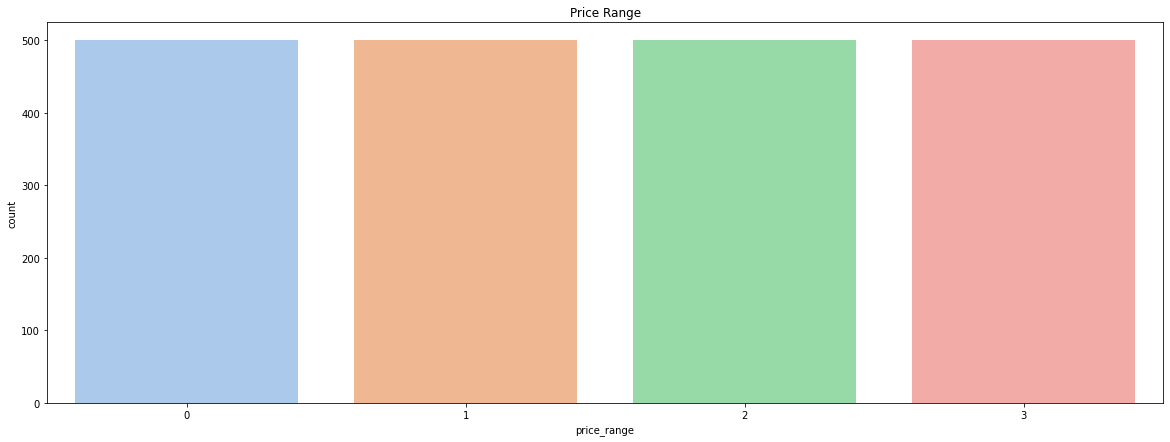

In [ ]:
#Count plot for Price_range distribution
plt.figure(figsize=(20,7))

sns.countplot(df["price_range"]).set_title("Price Range")
plt.show()

**Distribution of Categorical Features**

In [40]:
# value counts for each categorical feature
print('Dual Sim\n', df['dual_sim'].value_counts())
print("----"*30)
print('Wifi\n', df['wifi'].value_counts())
print("----"*30)
print('Bluetooth\n', df['blue'].value_counts())
print("----"*30)
print('Touch Screen\n', df['touch_screen'].value_counts())
print("----"*30)
print('3G\n', df['three_g'].value_counts())
print("----"*30)
print('4G\n', df['four_g'].value_counts())
print("----"*30)



Dual Sim
 1    1019
0     981
Name: dual_sim, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Wifi
 1    1014
0     986
Name: wifi, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Bluetooth
 0    1010
1     990
Name: blue, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Touch Screen
 1    1006
0     994
Name: touch_screen, dtype: int64
------------------------------------------------------------------------------------------------------------------------
3G
 1    1523
0     477
Name: three_g, dtype: int64
------------------------------------------------------------------------------------------------------------------------
4G
 1    1043
0     957
Name: four_g, dtype: int64
-----------------------------------------------------------

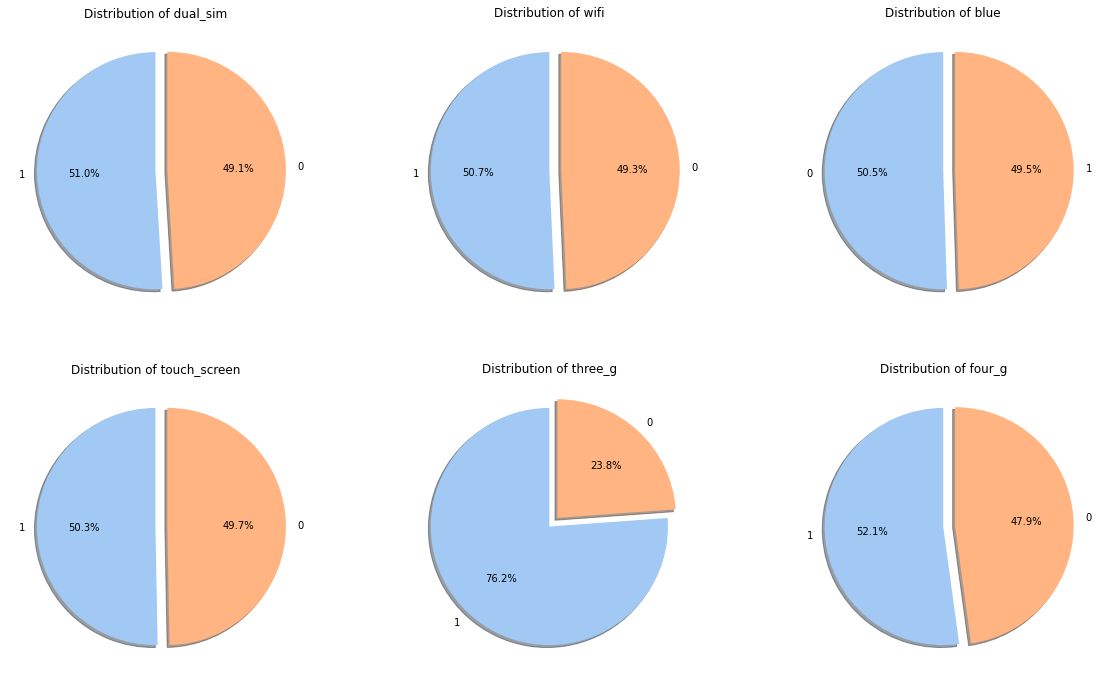

In [69]:
# Plotting Pie chart for our Categorical columns variables

plt.figure(figsize=(20,12))
count = 0

for feature in categorical_columns:
    
    explode = [0, 0.1]
    
    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values  
    
    plt.subplot(2,3,count+1)
    plt.pie(sizes, labels=labels, explode = explode, shadow = True, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {categorical_columns[count]}', color = 'black',fontsize = 12)
    count += 1

Distribution of Numerical Columns

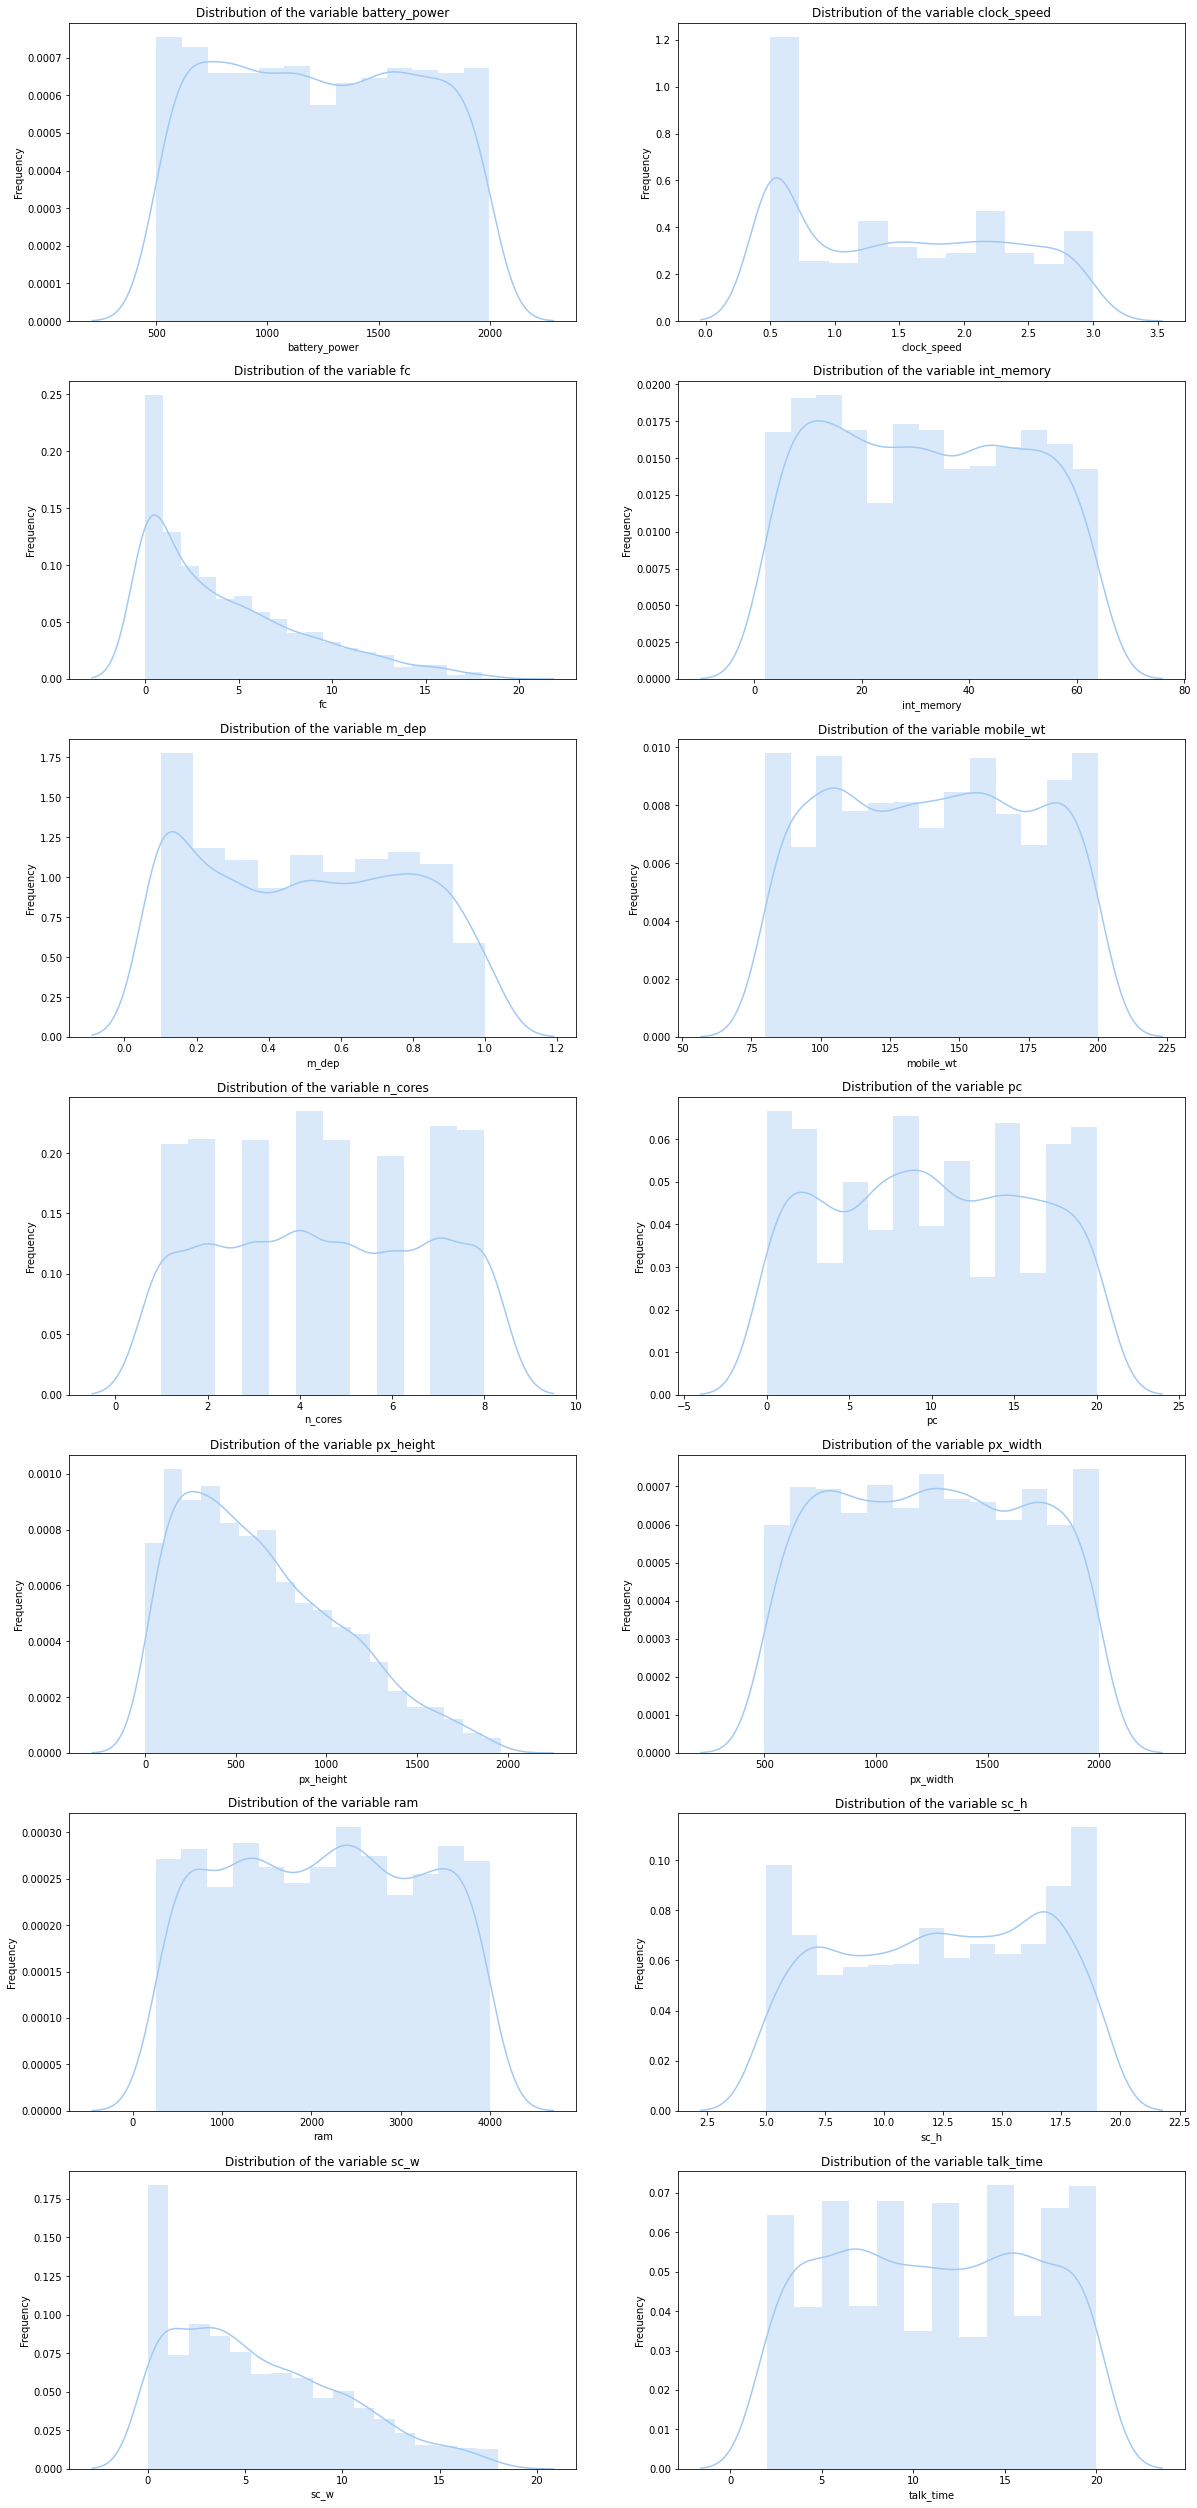

In [61]:
# Distribution of the Numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=12)
  plt.xlabel(f"{feature}")
  plt.ylabel("Frequency")
  count += 1
     

## **Bivariate Analysis**

**Distribution of Categorical Features with the Target varibale i.e, Price Range** 

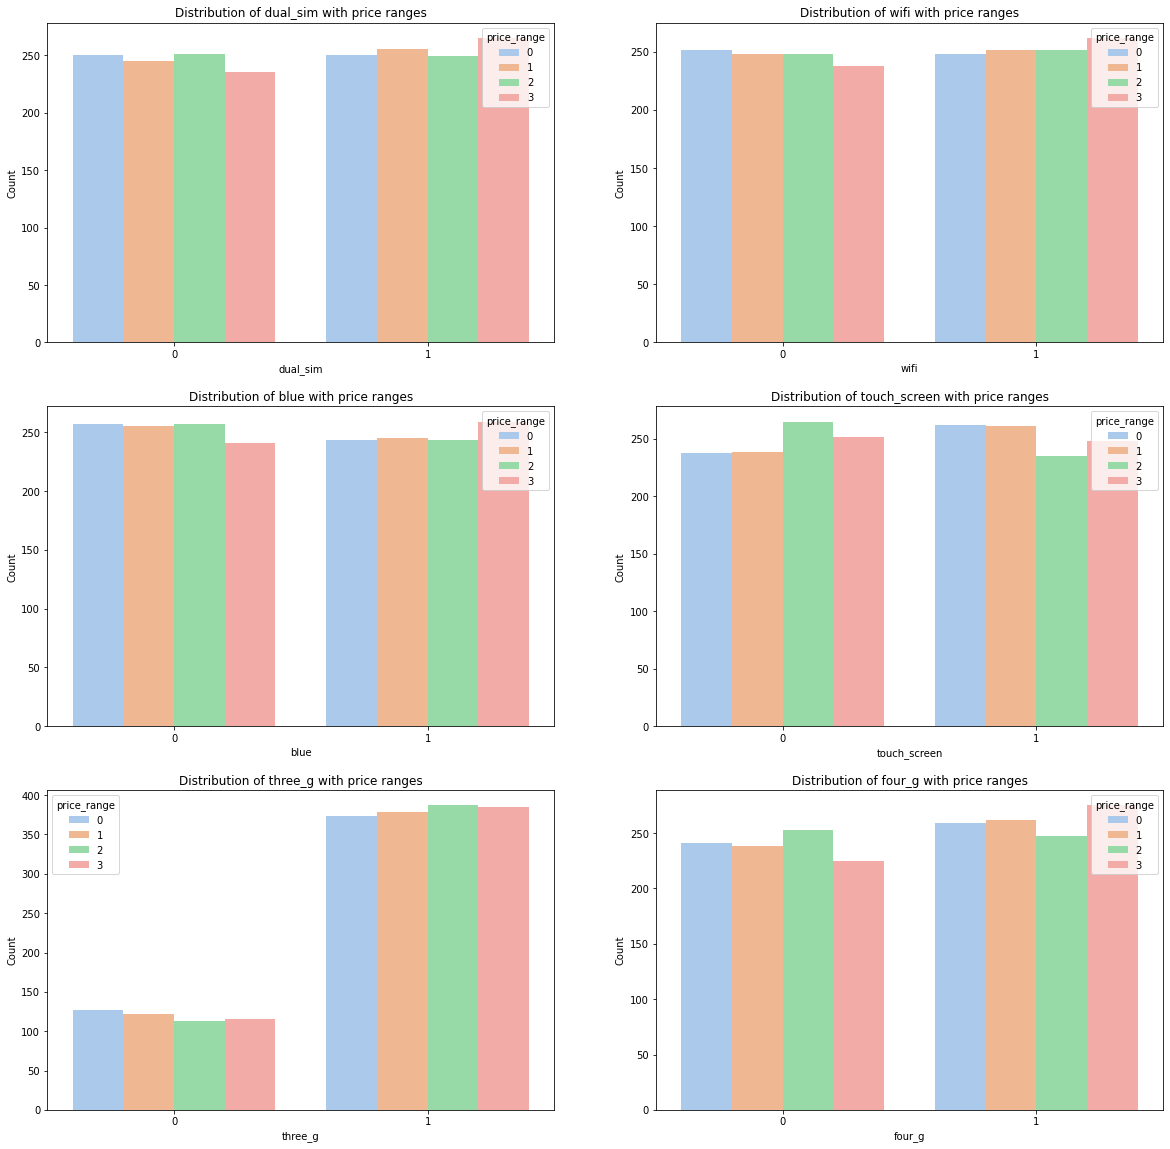

In [72]:
#Distribution of Categorical Columns vs Price Range
count = 1
plt.subplots(figsize=(20,20))
for feature in categorical_columns:
  plt.subplot(3,2,count)
  sns.countplot(df[feature], hue = df['price_range'])
  plt.title(f"Distribution of {feature} with price ranges", fontsize=12)
  plt.xlabel(f"{feature}")
  plt.ylabel("Count")
  count += 1

**Distribution of Numerical Features with the Target varibale i.e, Price Range**

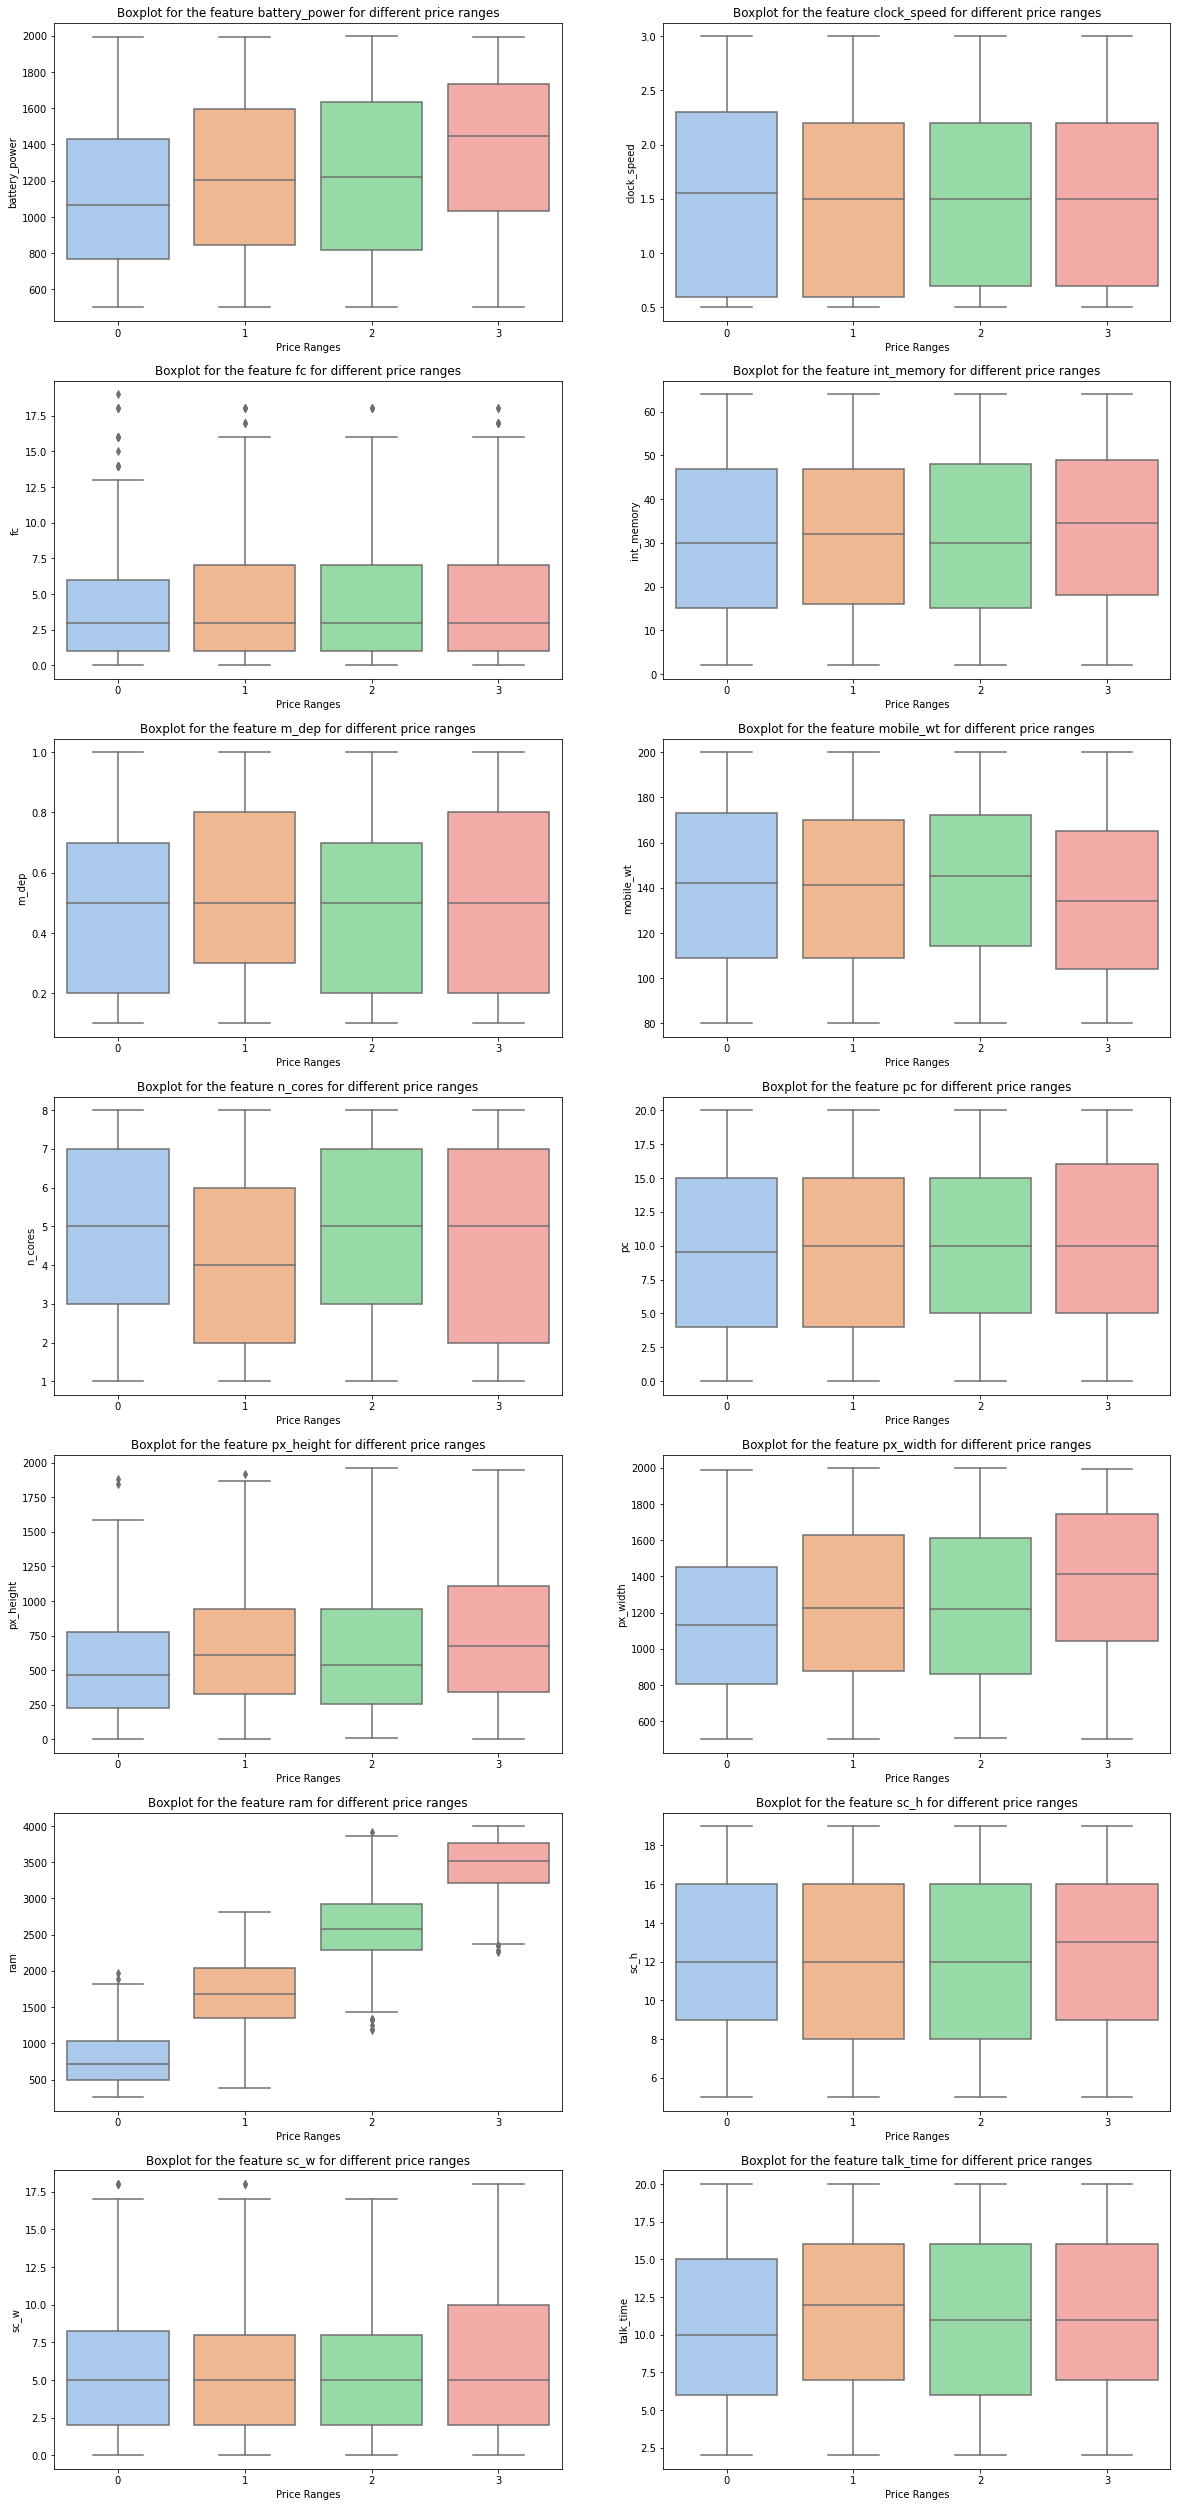

In [73]:
#Distribution of Numerical Columns VS Price Range
count = 1
plt.subplots(figsize=(20,45))
for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.boxplot(y = df[feature], x = df['price_range'])
  plt.title(f"Boxplot for the feature {feature} for different price ranges", fontsize=12)
  plt.xlabel("Price Ranges")
  plt.ylabel(f'{feature}')
  count += 1

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***